In [1]:
import numpy as np

from common.evaluate import evaluate_pose_error_J3d_P2d, mmd_J3d_J3d
from paik.solver import NSF, PAIK, Solver, get_solver
import torch
# set the same random seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

In [1]:
import numpy as np
from scipy.stats import norm

# Define the Gaussian distribution parameters
loc = 0.0
scale = 1.0

# Define the percentiles for 10% intervals
percentiles = np.linspace(0.05, 0.95, 10)

# Calculate the points corresponding to these percentiles
points = norm.ppf(percentiles, loc=loc, scale=scale)

print("Percentiles:", percentiles)
print("Points:", points)

Percentiles: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
Points: [-1.64485363 -1.03643339 -0.67448975 -0.38532047 -0.12566135  0.12566135
  0.38532047  0.67448975  1.03643339  1.64485363]


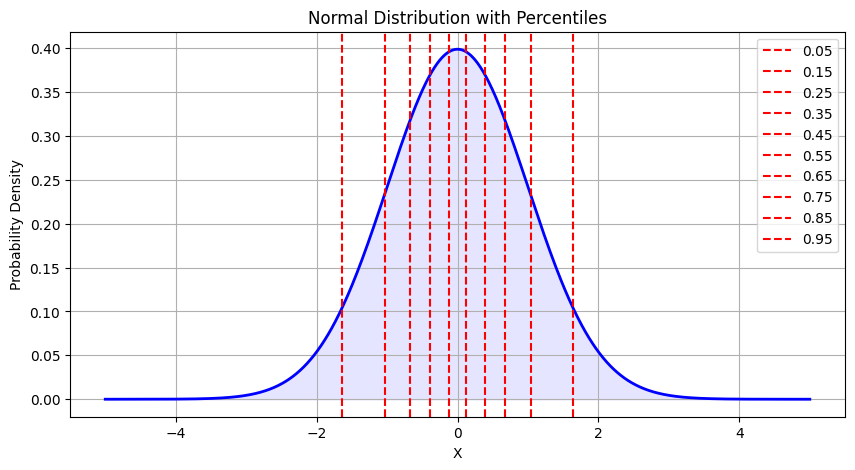

In [ ]:
# plot a normal distribution with the percentiles
import matplotlib.pyplot as plt

# Generate some data points for the normal distribution
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, loc=loc, scale=scale)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'b', lw=2)
plt.fill_between(x, y, color='blue', alpha=0.1)

# Add the percentiles as vertical lines
for i, p in enumerate(percentiles):
    plt.axvline(points[i], color='red', ls='--', label=f'{p:.2f}')

plt.title('Normal Distribution with Percentiles')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

In [5]:
ik_1 = nsf.generate_ik_solutions(P, num_sols=num_sols)

[INFO] Retrieve latent ids: [9 0 8 2 2 8 2 6 2 9]


In [7]:
ik_1[3], ik_1[4]

(array([[ 0.68666255,  0.60162404, -1.89308982, -2.32056342, -1.63677905,
          1.40748783,  3.02942408]]),
 array([[ 0.68666255,  0.60162404, -1.89308982, -2.32056342, -1.63677905,
          1.40748783,  3.02942408]]))

In [4]:
z = np.random.randn(num_sols, num_poses, nsf.n) * 0.25
J_hat = nsf.generate_ik_solutions_z(P, z)

[INFO] zsample: torch.Size([10, 10, 7])


In [5]:
l2, ang = evaluate_pose_error_J3d_P2d(
    # input J.shape = (num_sols, num_poses, num_dofs or n)
    nsf.robot, J_hat, P, return_all=True
)
l2.mean(), ang.mean()

(0.002391491343725345, 0.026514987178270357)

In [6]:
Z = nsf.generate_z_from_ik_solutions(P, J_hat)

In [7]:
C = nsf._get_conditions(nsf.P)
        
batch_size = 4000
C_batch, complementary = nsf._get_divisible_conditions(C, batch_size)
J_batch, _ = nsf._get_divisible_conditions(nsf.J, batch_size)
C_batch = C_batch.reshape(-1, batch_size, C_batch.shape[-1])
J_batch = J_batch.reshape(-1, batch_size, J_batch.shape[-1])
C_batch = nsf.normalize_input_data(C_batch, "C", return_torch=True)
J_batch = nsf.normalize_input_data(J_batch, "J", return_torch=True)

In [8]:
C_batch.shape

torch.Size([1250, 4000, 8])

In [10]:
Z = nsf.generate_z_from_dataset()
nsf.Z = Z

100%|██████████| 1250/1250 [00:46<00:00, 27.06it/s]


In [11]:
Z.shape

(5000000, 7)

In [24]:
P.shape, Q.shape

((10, 7), (10, 7))

In [25]:
k = 3
ids = nsf.J_knn.kneighbors(Q, n_neighbors=k, return_distance=False)
# shape: (num_poses, k) -> shape: (k, num_poses)  -> shape: (k * num_poses)   
ids = ids.T.flatten()
Z_from_retriever = nsf.Z[ids].reshape(k, -1, nsf.n)
Z_from_retriever.shape

(3, 10, 7)

In [26]:
J_hat = nsf.generate_ik_solutions(P)

[INFO] zsample: torch.Size([3, 10, 7])


In [29]:
l2, ang = evaluate_pose_error_J3d_P2d(
    # input J.shape = (num_sols, num_poses, num_dofs or n)
    nsf.robot, J_hat, P, return_all=True
)

J_hat, l2.mean(), ang.mean()

(array([[[-3.31831395e-01,  5.53793683e-01, -2.93761987e-01,
          -1.00853130e+00,  2.98260301e-01,  3.52948691e+00,
           2.86497496e+00],
         [ 9.58107473e-01,  1.53841400e+00, -1.60083879e+00,
          -1.03044418e+00, -2.81750608e+00,  1.17028075e+00,
           2.65757530e+00],
         [ 1.26421746e+00, -1.08115221e+00, -6.19726572e-01,
          -9.68137730e-01,  1.75946170e+00,  5.96916836e-01,
           6.98580843e-04],
         [ 2.95476622e+00, -1.60395111e+00, -2.41647105e+00,
          -1.71153156e+00,  2.55749870e+00,  3.80441753e-01,
           2.64321100e+00],
         [ 1.63458720e-01, -5.87918855e-01,  2.15731162e+00,
          -2.05632113e+00,  5.77481415e-01,  1.74245126e+00,
           2.04423553e+00],
         [-1.98495390e+00,  1.50547179e+00, -1.42433026e+00,
          -2.81718394e+00, -1.20824063e-02,  2.98994683e+00,
          -4.54542510e-01],
         [ 1.52867439e+00,  2.00881696e-01, -2.63599288e+00,
          -9.19316771e-01,  5.36244304e

In [28]:
Q

array([[-0.47813367,  0.75401898,  0.38477857, -0.34651987,  1.56624594,
         3.37616003,  1.23805015],
       [ 0.9516884 ,  1.61753734, -1.71370916, -1.02782358, -2.69299185,
         1.19453485,  2.69865112],
       [ 1.17901648, -1.02719825, -0.73656699, -0.97782709,  1.95747637,
         0.52060569,  0.0307969 ],
       [ 2.85962467, -1.70733469, -2.34655172, -1.67812004,  2.29232654,
         0.45315506,  2.48292335],
       [ 0.34651804, -0.83356563,  1.9193927 , -2.0292541 ,  0.7855137 ,
         1.59226584,  1.89213008],
       [-1.96927503,  1.56327791, -1.35026079, -2.80812454,  0.30779575,
         2.97060507, -0.69504103],
       [ 0.36424706,  0.49430428, -2.40168094, -0.83186423,  1.63553567,
         2.44896337,  1.07883102],
       [-0.17201711, -0.84923803,  2.13306025, -2.38871523, -2.44976751,
         0.34778621,  0.51843398],
       [-2.72520849, -1.30546461, -2.28180756, -1.75879815, -1.92776707,
         3.37079207, -2.25003372],
       [-2.81876333,  0.8899

In [15]:
from sklearn.neighbors import KernelDensity
import numpy as np
rng = np.random.RandomState(42)
X = rng.random_sample((1000, 10))
kde = KernelDensity(kernel='gaussian', bandwidth='scott').fit(X)
log_density = kde.score_samples(X[:3])
density = np.exp(log_density)
density

array([0.00188191, 0.0018762 , 0.00262504])

In [17]:
def retrieve_latent_random(nsf, P, k=3):
    # shape: (num_poses, k) -> shape: (k, num_poses)  -> shape: (k * num_poses)   
    ids = np.random.choice(nsf.Z.shape[0], size=k * P.shape[0])
    Z_from_retriever = nsf.Z[ids].reshape(k, -1, nsf.n)
    return Z_from_retriever

J_hat = nsf.generate_ik_solutions(P, latent=retrieve_latent_random(nsf, P, k=3))

l2, ang = evaluate_pose_error_J3d_P2d(
    # input J.shape = (num_sols, num_poses, num_dofs or n)
    nsf.robot, J_hat, P, return_all=True
)

J_hat, l2.mean(), ang.mean()

[INFO] zsample: torch.Size([3, 10, 7])


(array([[[-0.56983889, -1.75718682,  1.92132765, -1.49288864,
           2.63523365,  2.13125222, -1.31622444],
         [-2.53703618, -1.08433767,  2.46056838, -1.2939548 ,
           0.36704743,  1.0854832 ,  0.09402749],
         [ 2.11695889,  1.54050658, -1.53919242, -1.42744076,
          -1.04969303,  2.17757248,  0.03774959],
         [-1.63435316, -0.33219711,  0.35427749, -2.13327943,
          -2.43783981,  2.29258477, -0.27085495],
         [-2.18398905,  1.25297939,  2.3516816 , -2.46395189,
           0.07793708,  1.37128505, -1.19071427],
         [ 0.55906822,  1.69489908, -2.7262792 , -2.11871862,
           2.55428871,  2.8924417 , -3.25569602],
         [-0.57813888, -1.42137614,  0.87403833, -0.33850012,
          -1.9896887 ,  0.93833362, -2.51586121],
         [ 0.9807585 , -0.49972024, -0.42998273, -2.06959917,
           0.3926429 ,  1.943103  , -0.0969265 ],
         [ 0.66406813, -1.19950841,  1.33142633, -0.60559512,
           1.80216964,  2.95753846, -2.617